In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path_data = rf"G:\Mi unidad\Facultad\Maestria\Tesis\Estimaciones\data\data_out"

In [42]:
# abro base en dta

base_tesis = pd.read_stata(path_data + r'\base_tesis_completa_graficos.dta')

In [14]:
base_tesis['año'].unique()

array([1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999.,
       2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
       2018., 2019., 2020., 2021.])

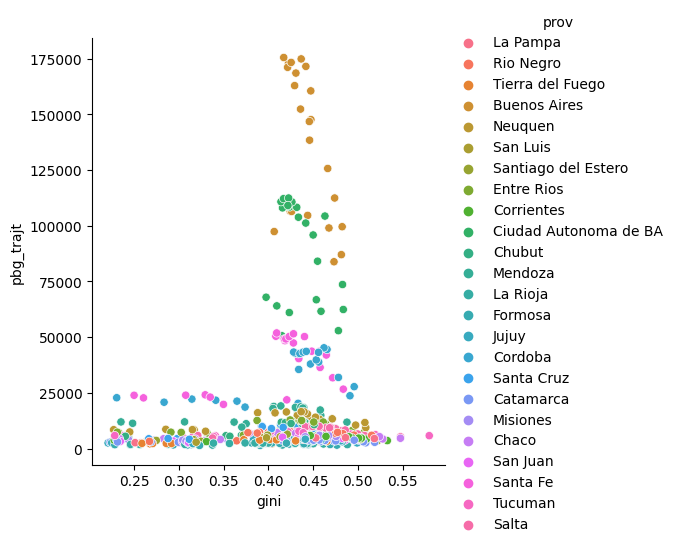

In [16]:
sns.relplot(
    data=base_tesis,
    x="gini", y="pbg_trajt", hue="prov"
)

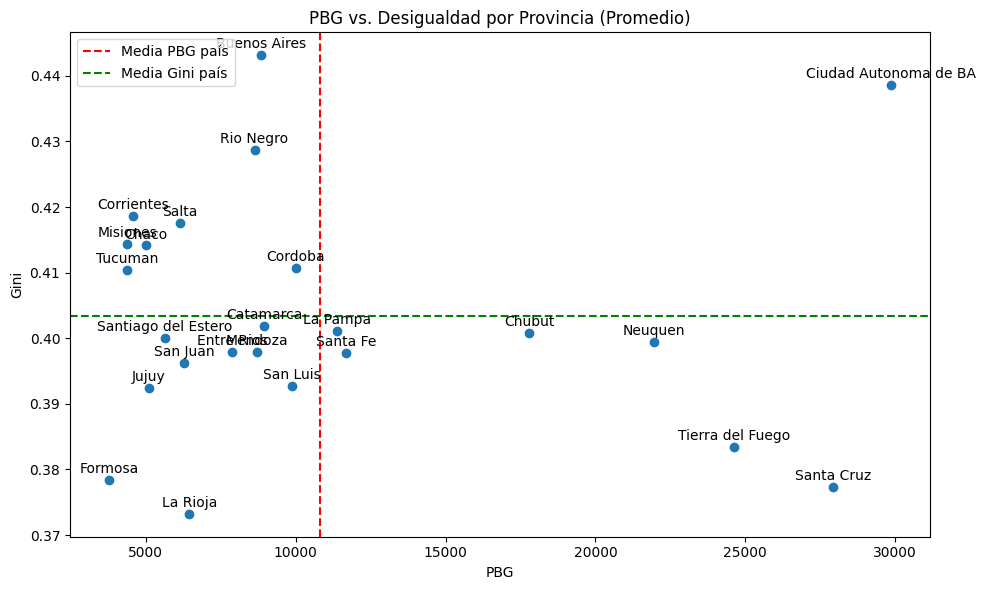

In [56]:
# Cargar los datos desde un archivo CSV (reemplaza 'ruta_archivo.csv' con la ruta correcta)
data = base_tesis[['año', 'prov', 'pbg_trajt_pc', 'gini', 'region', 'nreg']]

# Calcular el promedio por provincia
promedio_por_provincia = data.groupby('prov').mean().reset_index()

# Crear el gráfico de puntos con el promedio por provincia
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(promedio_por_provincia['pbg_trajt_pc'], promedio_por_provincia['gini'])

# Agregar la media nacional como referencia
media_pais = data[['pbg_trajt_pc', 'gini']].mean()
ax.axvline(x=media_pais['pbg_trajt_pc'], color='r', linestyle='--', label='Media PBG país')
ax.axhline(y=media_pais['gini'], color='g', linestyle='--', label='Media Gini país')

# Etiquetas de las provincias
for i, row in promedio_por_provincia.iterrows():
    ax.annotate(row['prov'], (row['pbg_trajt_pc'], row['gini']), textcoords="offset points", xytext=(0,5), ha='center')

ax.set_xlabel('PBG')
ax.set_ylabel('Gini')
ax.set_title('PBG vs. Desigualdad por Provincia (Promedio)')
ax.legend()

plt.tight_layout()
plt.show()

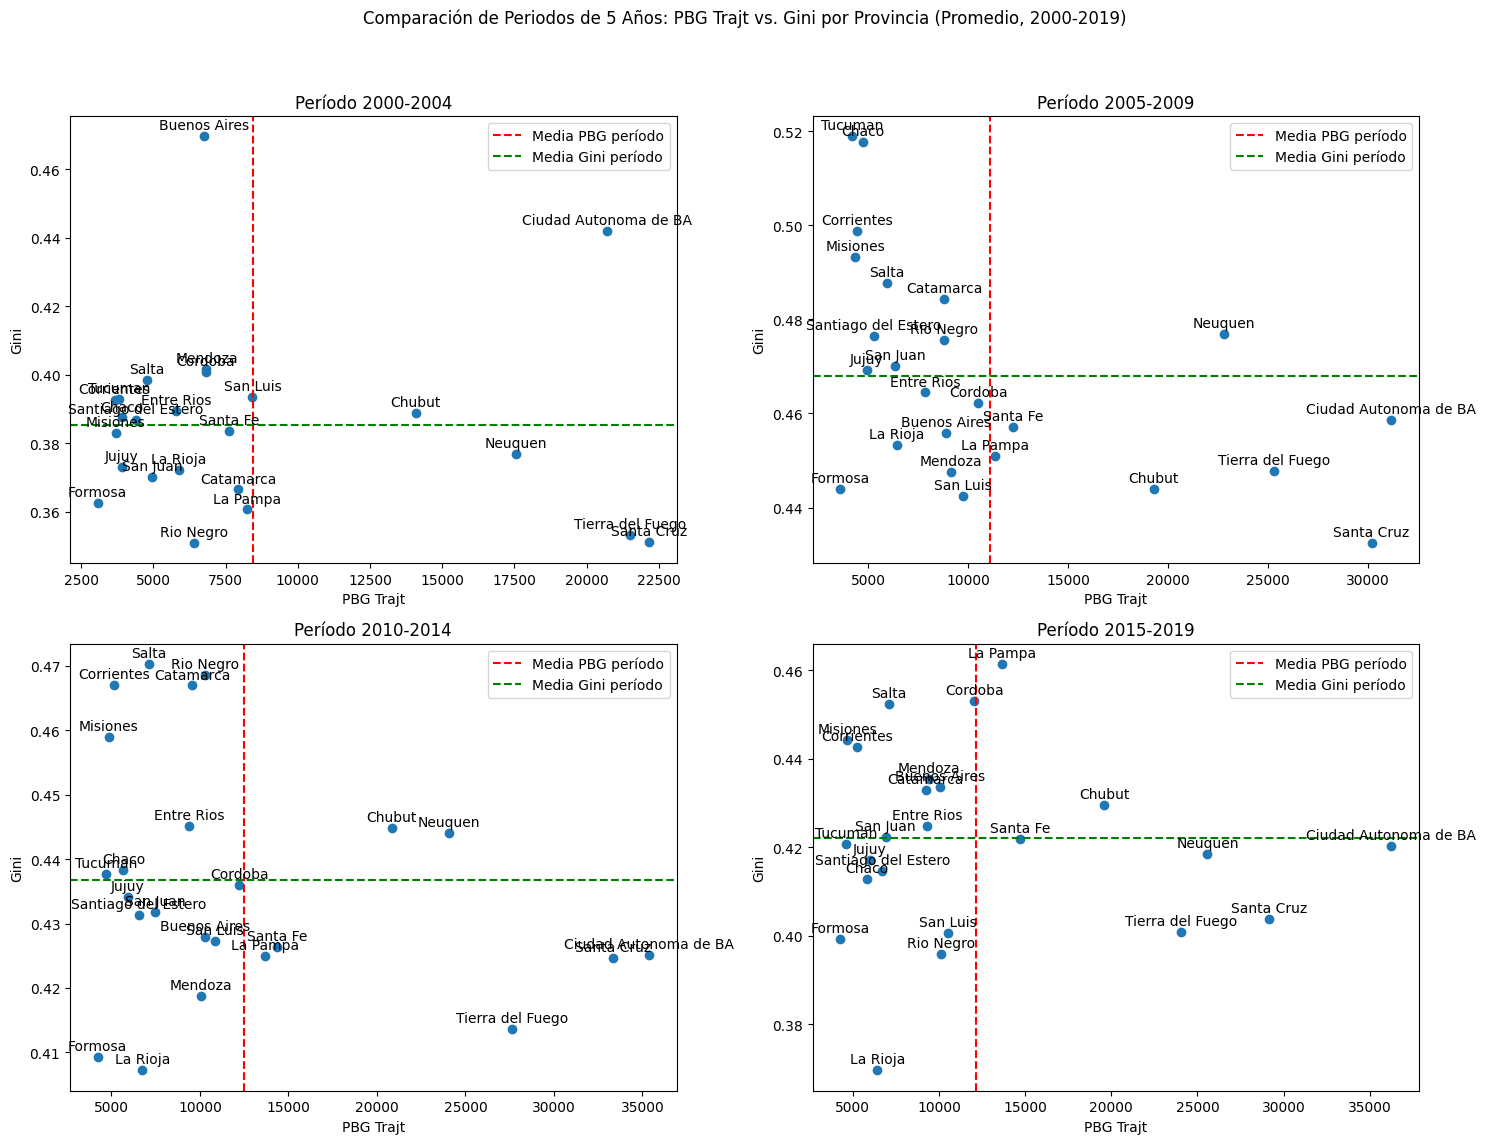

In [29]:
# Filtrar los datos para el periodo de 2000 a 2019
data_periodo = data[(data['año'] >= 2000) & (data['año'] <= 2019)]

# Crear subconjuntos para cada período de 5 años
periodos = [(2000, 2004), (2005, 2009), (2010, 2014), (2015, 2019)]
subconjuntos = [data_periodo[(data_periodo['año'] >= inicio) & (data_periodo['año'] <= fin)] for inicio, fin in periodos]

# Crear una figura y ejes para cada gráfico individual
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Comparación de Periodos de 5 Años: PBG Trajt vs. Gini por Provincia (Promedio, 2000-2019)')

# Generar los gráficos individuales para cada período de 5 años
for i, ax in enumerate(axs.flatten()):
    subconjunto = subconjuntos[i]
    promedio_por_provincia = subconjunto.groupby('prov').mean().reset_index()

    ax.scatter(promedio_por_provincia['pbg_trajt_pc'], promedio_por_provincia['gini'])
    ax.axvline(x=promedio_por_provincia['pbg_trajt_pc'].mean(), color='r', linestyle='--', label='Media PBG período')
    ax.axhline(y=promedio_por_provincia['gini'].mean(), color='g', linestyle='--', label='Media Gini período')

    for j, row in promedio_por_provincia.iterrows():
        ax.annotate(row['prov'], (row['pbg_trajt_pc'], row['gini']), textcoords="offset points", xytext=(0, 5), ha='center')

    ax.set_xlabel('PBG Trajt')
    ax.set_ylabel('Gini')
    ax.set_title(f'Período {periodos[i][0]}-{periodos[i][1]}')
    ax.legend()

# Ajustar el espacio entre los gráficos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Mostrar la imagen final con los cuatro gráficos
plt.show()

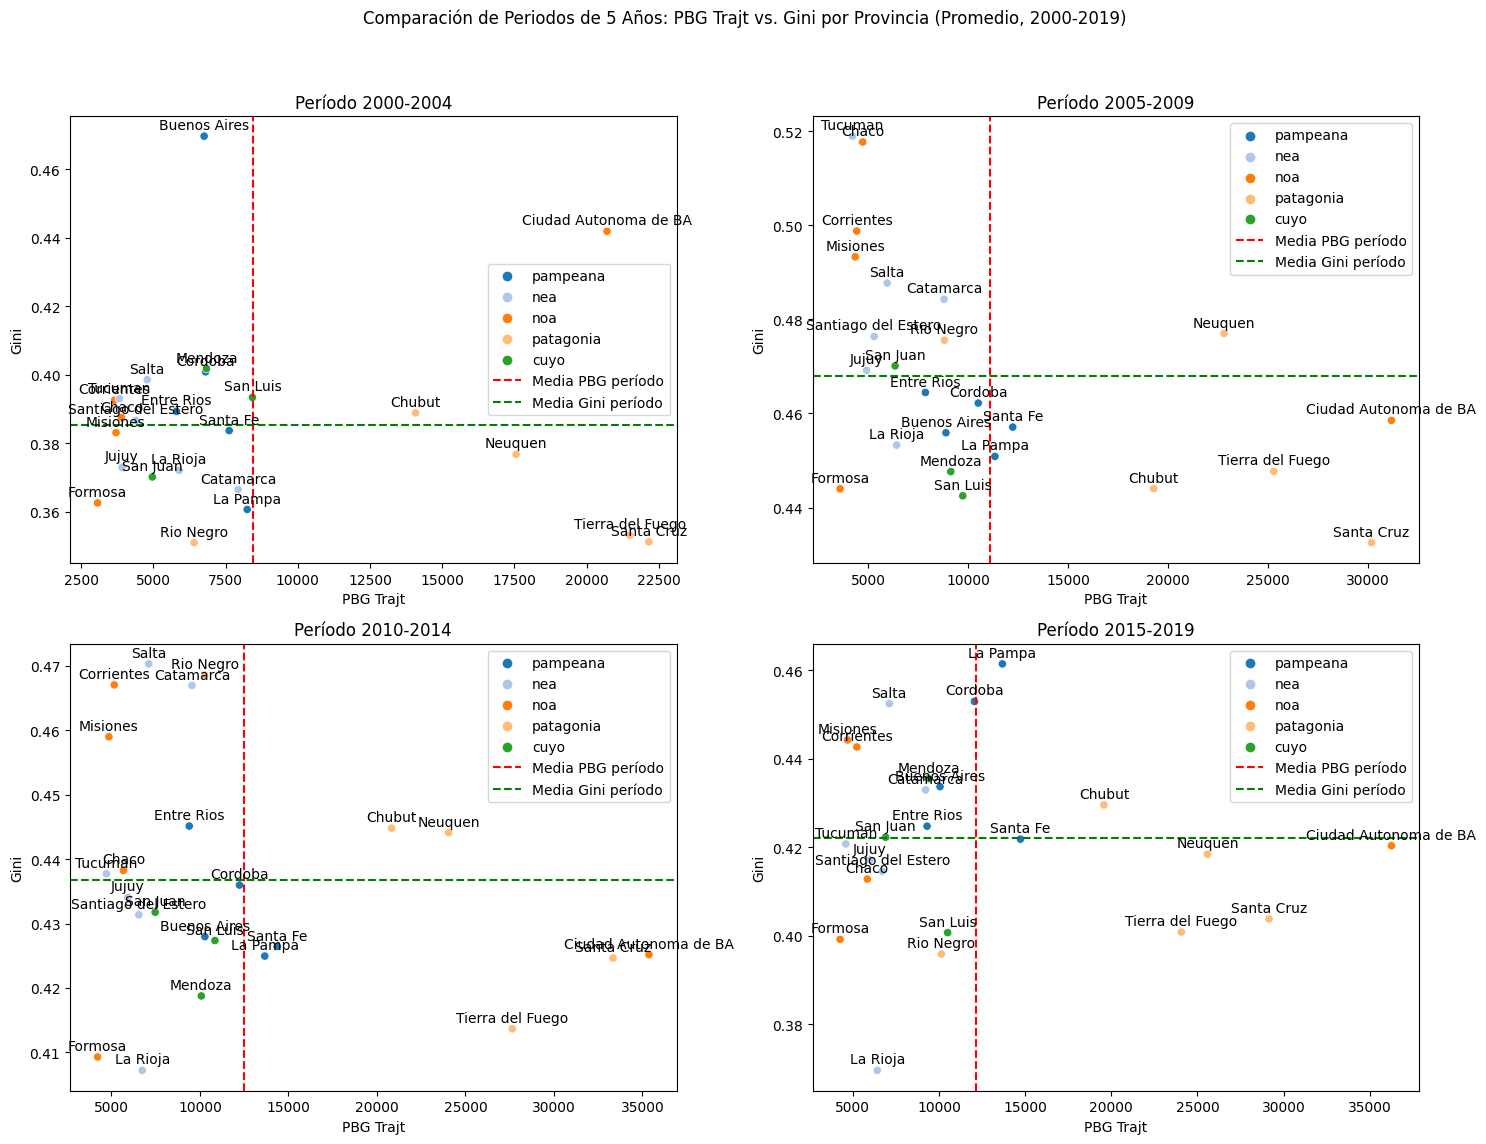

In [72]:
# Filtrar los datos para el periodo de 2000 a 2019
data_periodo = data[(data['año'] >= 2000) & (data['año'] <= 2019)]

# Crear subconjuntos para cada período de 5 años
periodos = [(2000, 2004), (2005, 2009), (2010, 2014), (2015, 2019)]
subconjuntos = [data_periodo[(data_periodo['año'] >= inicio) & (data_periodo['año'] <= fin)] for inicio, fin in periodos]

# Crear una figura y ejes para cada gráfico individual
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Comparación de Periodos de 5 Años: PBG Trajt vs. Gini por Provincia (Promedio, 2000-2019)')

# Generar los gráficos individuales para cada período de 5 años
for i, ax in enumerate(axs.flatten()):
    subconjunto = subconjuntos[i]
    promedio_por_provincia = subconjunto.groupby('prov').mean().reset_index()
    promedio_por_provincia['region'] = subconjunto[['prov', 'region']].groupby('prov').first().reset_index()['region']
    promedio_por_provincia['reg_cat'] = pd.Categorical(promedio_por_provincia['region'])

    # Utilizar Seaborn para generar el gráfico de puntos con colores por región
    sns.scatterplot(x='pbg_trajt_pc', y='gini', hue='region', data=promedio_por_provincia, palette='tab20', ax=ax)
    
    ax.axvline(x=promedio_por_provincia['pbg_trajt_pc'].mean(), color='r', linestyle='--', label='Media PBG período')
    ax.axhline(y=promedio_por_provincia['gini'].mean(), color='g', linestyle='--', label='Media Gini período')

    for j, row in promedio_por_provincia.iterrows():
        ax.annotate(row['prov'], (row['pbg_trajt_pc'], row['gini']), textcoords="offset points", xytext=(0, 5), ha='center')

    ax.set_xlabel('PBG Trajt')
    ax.set_ylabel('Gini')
    ax.set_title(f'Período {periodos[i][0]}-{periodos[i][1]}')
    ax.legend()

# Ajustar el espacio entre los gráficos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Mostrar la imagen final con los cuatro gráficos
plt.show()

In [59]:
data

,año,prov,pbg_trajt_pc,gini,region,nreg
0,1991.0,La Rioja,NaN,NaN,nea,4.0
1,1991.0,Santiago del Estero,NaN,NaN,nea,4.0
2,1991.0,San Luis,NaN,NaN,cuyo,2.0
3,1991.0,Chubut,NaN,NaN,patagonia,5.0
4,1991.0,Corrientes,NaN,NaN,noa,3.0
...,...,...,...,...,...,...
739,2021.0,Tucuman,NaN,0.463535,nea,4.0
740,2021.0,Rio Negro,NaN,0.420066,patagonia,5.0
741,2021.0,Salta,NaN,0.489729,nea,4.0
742,2021.0,Santa Cruz,NaN,0.454561,patagonia,5.0


NameError: name 'tab20' is not defined

['#335C67', '#FFF3B0', '#E09F3E', '#9E2A2B', '#540B0E']

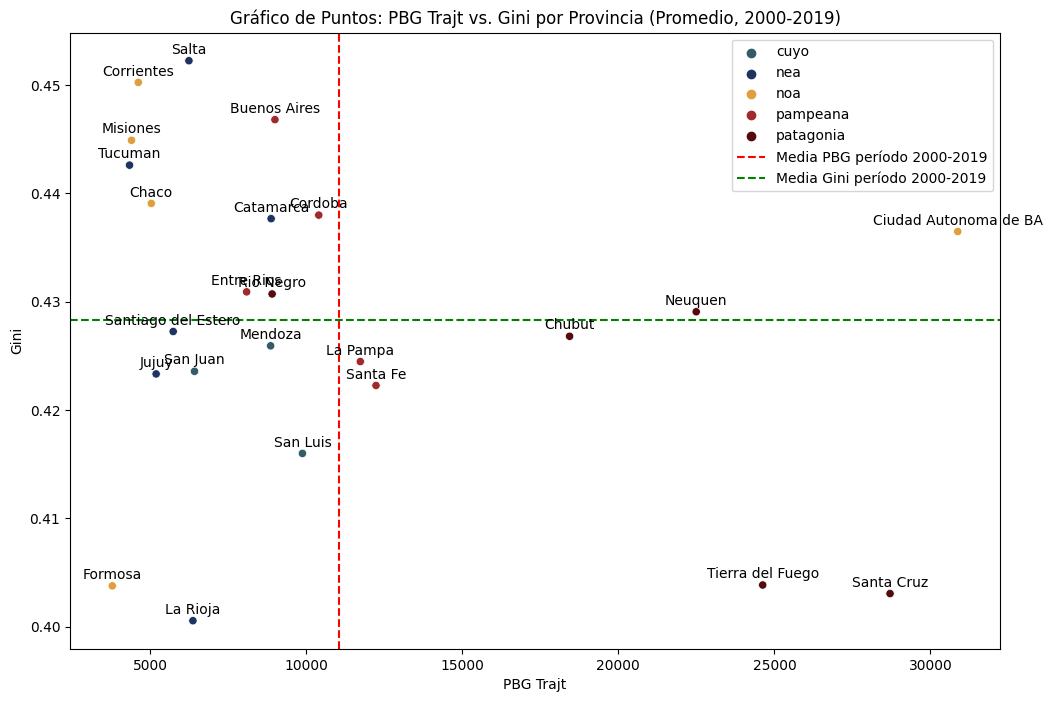

In [91]:
# Filtrar los datos para el periodo de 2000 a 2019
data_periodo = data[(data['año'] >= 2000) & (data['año'] <= 2019)]
colores = ['#335C67', '#1D3461', '#E09F3E', '#9E2A2B', '#540B0E']
sns.set_palette(sns.color_palette(colores))



# Calcular el promedio por provincia para todo el periodo de 2000 a 2019
promedio_por_provincia = data_periodo.groupby('prov').mean().reset_index()
promedio_por_provincia['region'] = data_periodo[['prov', 'region']].groupby('prov').first().reset_index()['region']
promedio_por_provincia['reg_cat'] = pd.Categorical(promedio_por_provincia['region'])


# Crear el gráfico de puntos con colores por región
plt.figure(figsize=(12, 8))
sns.scatterplot(x='pbg_trajt_pc', y='gini', hue='reg_cat', data=promedio_por_provincia, palette=colores)

# Agregar la media nacional como referencia para todo el periodo de 2000 a 2019
media_pais_periodo = data_periodo[['pbg_trajt_pc', 'gini']].mean()
plt.axvline(x=media_pais_periodo['pbg_trajt_pc'], color='r', linestyle='--', label='Media PBG período 2000-2019')
plt.axhline(y=media_pais_periodo['gini'], color='g', linestyle='--', label='Media Gini período 2000-2019')

# Etiquetas de las provincias
for i, row in promedio_por_provincia.iterrows():
    plt.annotate(row['prov'], (row['pbg_trajt_pc'], row['gini']), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xlabel('PBG Trajt')
plt.ylabel('Gini')
plt.title('Gráfico de Puntos: PBG Trajt vs. Gini por Provincia (Promedio, 2000-2019)')
plt.legend()

# Mostrar el gráfico final
plt.show()

In [93]:
## Plantilla para Graficos
# Change global font:
font = 'Yu Gothic'#'Century Gothic'
plt.rcParams["font.family"] = font

# Change the style of plot
plt.style.use('seaborn-white')

# set figure size
my_dpi=100

In [96]:
import matplotlib.pyplot
import matplotlib.ticker

NameError: name 'legend' is not defined

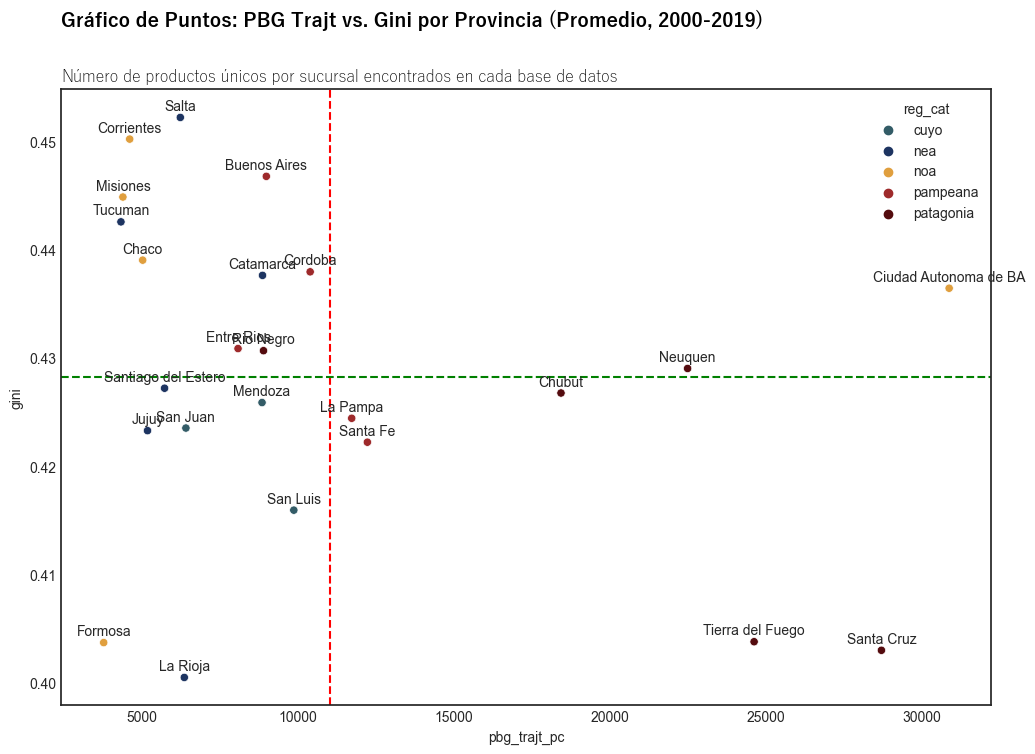

In [99]:
import locale
# Use '' for auto, or force e.g. to 'en_US.UTF-8'
locale.setlocale(locale.LC_ALL, '')
# Calcular el promedio por provincia para todo el periodo de 2000 a 2019
promedio_por_provincia = data_periodo.groupby('prov').mean().reset_index()
promedio_por_provincia['region'] = data_periodo[['prov', 'region']].groupby('prov').first().reset_index()['region']
promedio_por_provincia['reg_cat'] = pd.Categorical(promedio_por_provincia['region'])


# Creo un stacked bar chart para ver la cantidad de eans por supermercado
# Plot
# plt.figure(figsize=(500*1.8/my_dpi, 500/my_dpi), dpi=my_dpi, facecolor='w')
plt.figure(figsize=(12, 8), facecolor='w')

data_periodo = data[(data['año'] >= 2000) & (data['año'] <= 2019)]
colores = ['#335C67', '#1D3461', '#E09F3E', '#9E2A2B', '#540B0E']

sns.scatterplot(x='pbg_trajt_pc', y='gini', hue='reg_cat', data=promedio_por_provincia, palette=colores)

# Agregar la media nacional como referencia para todo el periodo de 2000 a 2019
media_pais_periodo = data_periodo[['pbg_trajt_pc', 'gini']].mean()
plt.axvline(x=media_pais_periodo['pbg_trajt_pc'], color='r', linestyle='--', label='Media PBG período 2000-2019')
plt.axhline(y=media_pais_periodo['gini'], color='g', linestyle='--', label='Media Gini período 2000-2019')

# Etiquetas de las provincias
for i, row in promedio_por_provincia.iterrows():
    plt.annotate(row['prov'], (row['pbg_trajt_pc'], row['gini']), textcoords="offset points", xytext=(0, 5), ha='center')

# Add titles and labels
title_pos = plt.gcf().subplotpars.left
# plt.legend(bbox_to_anchor=(1.05, 1), loc='center right', borderaxespad=0)
plt.suptitle('Gráfico de Puntos: PBG Trajt vs. Gini por Provincia (Promedio, 2000-2019)',
             x=title_pos, horizontalalignment='left', fontsize=14, fontweight='bold', color='black',
             fontdict={"family": font}
             )
plt.title("Número de productos únicos por sucursal encontrados en cada base de datos",
          loc='left', fontsize=12, fontweight='ultralight', color='black',
          fontdict={"family": font}
          )

# legend = plt.legend(title="EANs encontrados en:")
# legend.get_title().set_fontweight('bold')

plt.xlabel('PBG Trajt', fontweight='bold', fontdict={"family": font})
plt.ylabel('Gini')

# Ticks
plt.xticks(fontsize=9, fontfamily=font, fontweight='normal')
plt.yticks(fontsize=9, fontfamily=font, fontweight='normal')
plt.gca().yaxis.set_major_formatter(
    matplotlib.ticker.FuncFormatter(
        lambda x, p: f'{x:,.0f}'
    )
)
# plt.gca().yaxis.set_major_formatter(
#     matplotlib.ticker.FuncFormatter(
#         lambda x, p: str(round(x*100, 2)).replace(',', '.')+"%")
# )

# Remove spines
sns.despine(left=True)

# Set span
#plt.axvspan('2023-02-15', '2023-03-01', color='gray', alpha=0.2)

# Grid and range
plt.gca().grid(axis='y', alpha=0.5)
# plt.gca().set_xlim(inscripciones_por_dia.index[0] - timedelta(days=4),
#                    inscripciones_por_dia.index[-1] + timedelta(days=4))


# Show the graph
# plt.gcf().savefig(path_figures +
#                   f'/productos_totales_por_super.png', dpi=300)
plt.show()